In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
!pip install pyforest

In [3]:
from pyforest import * 
lazy_imports()

['from sklearn import metrics',
 'import plotly as py',
 'from sklearn.decomposition import PCA',
 'import awswrangler as wr',
 'import statsmodels.api as sm',
 'from sklearn.ensemble import RandomForestRegressor',
 'from pyspark import SparkContext',
 'import plotly.express as px',
 'import lightgbm as lgb',
 'import plotly.graph_objs as go',
 'import dash',
 'import textblob',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import glob',
 'import sklearn',
 'from sklearn import svm',
 'from sklearn.linear_model import Lasso',
 'from sklearn.model_selection import train_test_split',
 'import bokeh',
 'from sklearn.preprocessing import MinMaxScaler',
 'import torch',
 'import gensim',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import keras',
 'from sklearn.preprocessing import RobustScaler',
 'import re',
 'from sklearn.linear_model import ElasticNet',
 'import numpy as np',
 'from pathlib impor

In [4]:
data = pd.read_csv("C:/Users/Mert/Desktop/breastCancer.csv")

<IPython.core.display.Javascript object>

In [8]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
data.shape


(699, 11)

In [10]:
data.columns

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [11]:
##PREPROCESSING

In [12]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [13]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [14]:
data.shape

(699, 11)

In [15]:
data['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [17]:
data[data['bare_nucleoli'] == '?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [20]:
df = data[data['bare_nucleoli'] != '?'] #Remove rows with missing data


In [21]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [23]:
df.shape

(683, 11)

In [24]:
df.median()

id                   1171795.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [25]:
df = df.fillna(df.median())

In [26]:
df.head(10)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [27]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [28]:
df["bare_nucleoli"] = df["bare_nucleoli"].astype("int64")

In [29]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [30]:
df.drop('id',axis=1,inplace=True)

In [31]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
size_uniformity,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
shape_uniformity,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
epithelial_size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
bland_chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


<IPython.core.display.Javascript object>

C:\Users\Mert\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

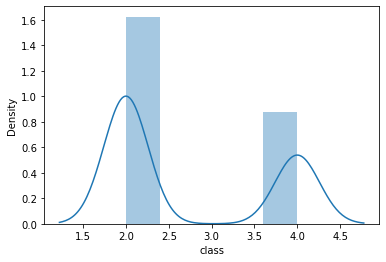

In [34]:
sns.distplot(df['class'])

array([[<AxesSubplot:title={'center':'clump_thickness'}>,
        <AxesSubplot:title={'center':'size_uniformity'}>,
        <AxesSubplot:title={'center':'shape_uniformity'}>],
       [<AxesSubplot:title={'center':'marginal_adhesion'}>,
        <AxesSubplot:title={'center':'epithelial_size'}>,
        <AxesSubplot:title={'center':'bare_nucleoli'}>],
       [<AxesSubplot:title={'center':'bland_chromatin'}>,
        <AxesSubplot:title={'center':'normal_nucleoli'}>,
        <AxesSubplot:title={'center':'mitoses'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

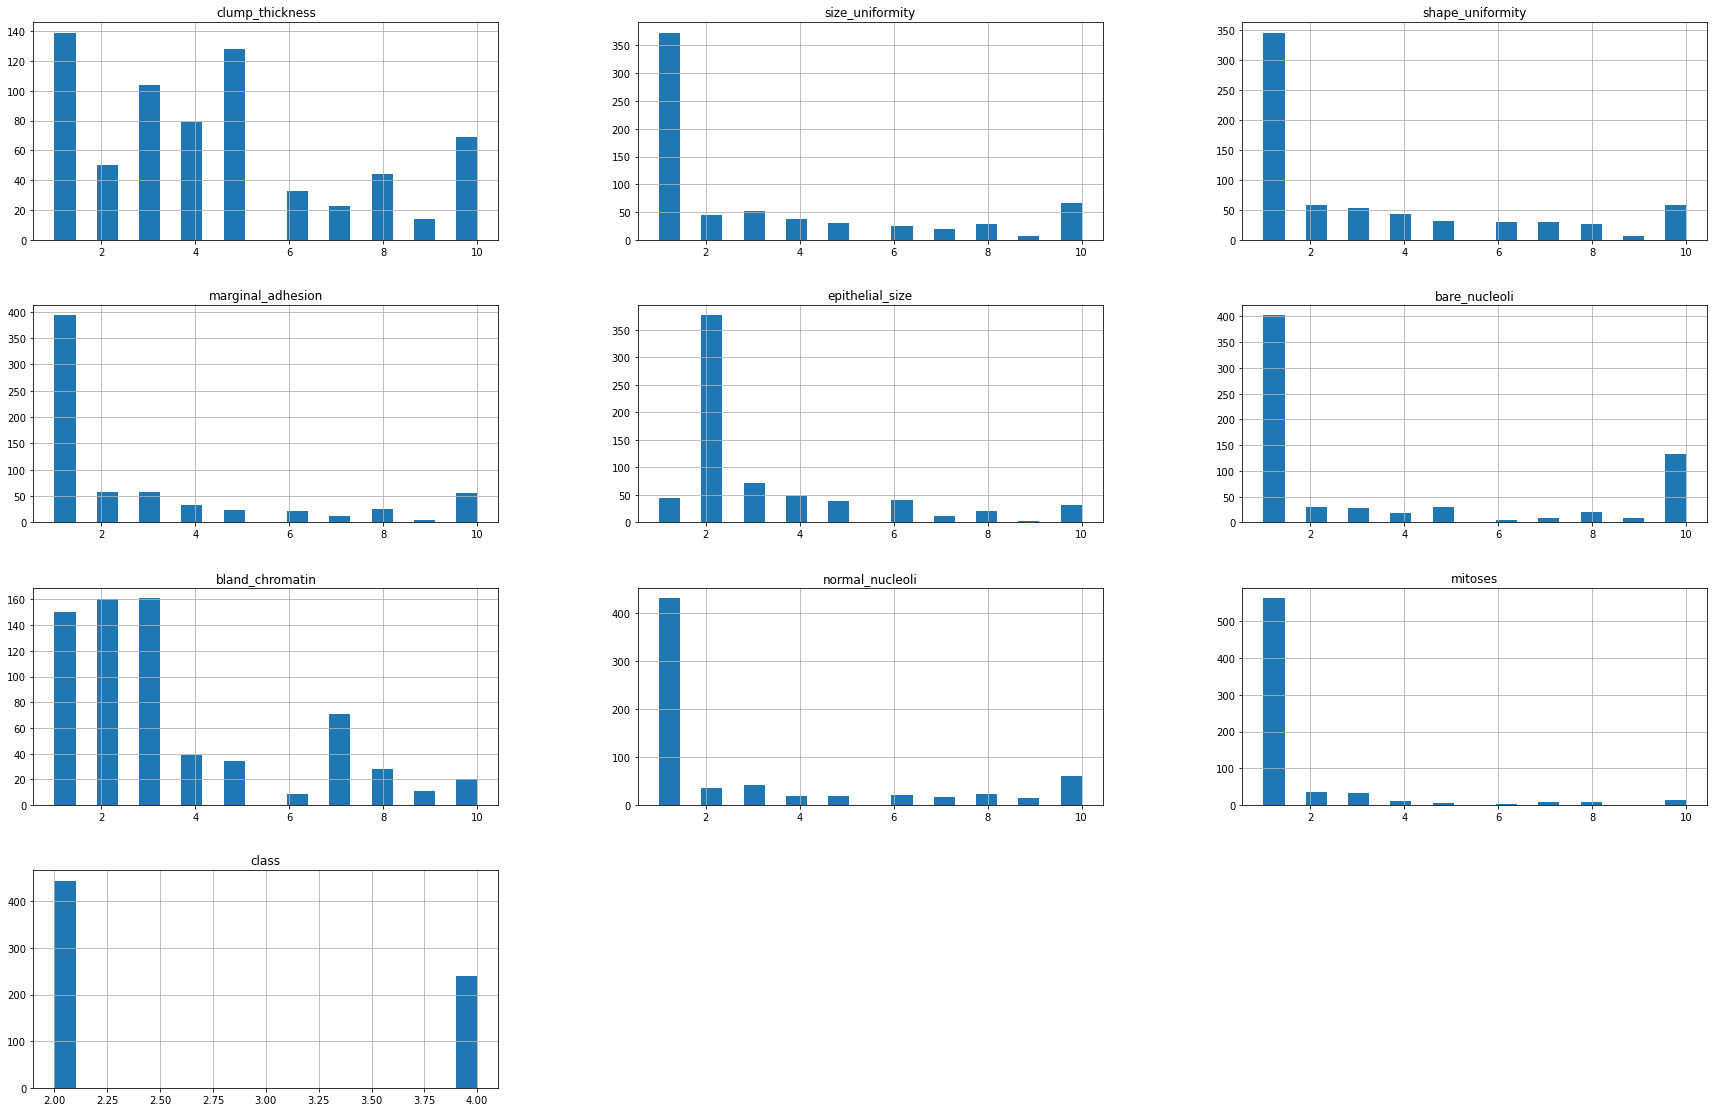

In [37]:
df.hist(bins=20, figsize =(30,30), layout = (6,3))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

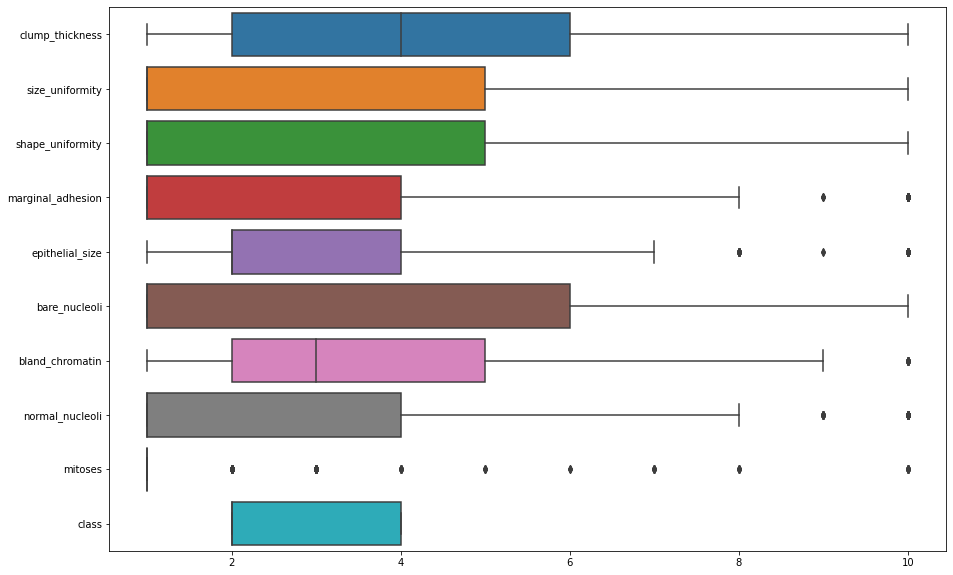

In [39]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df,orient = 'h')

In [40]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
size_uniformity,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
shape_uniformity,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marginal_adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
epithelial_size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nucleoli,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normal_nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

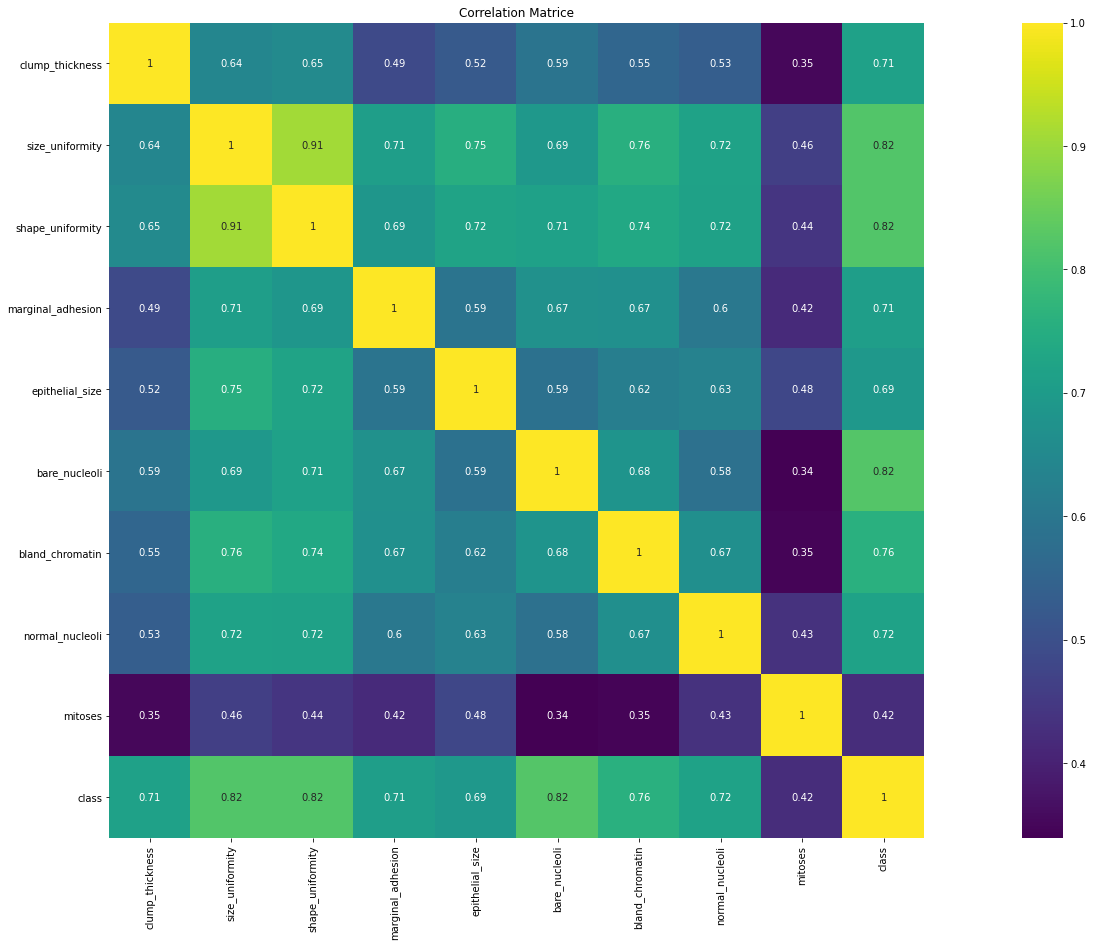

In [42]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),square=True,annot=True,cmap='viridis')
plt.title('Correlation Matrice')
plt.show()

<IPython.core.display.Javascript object>

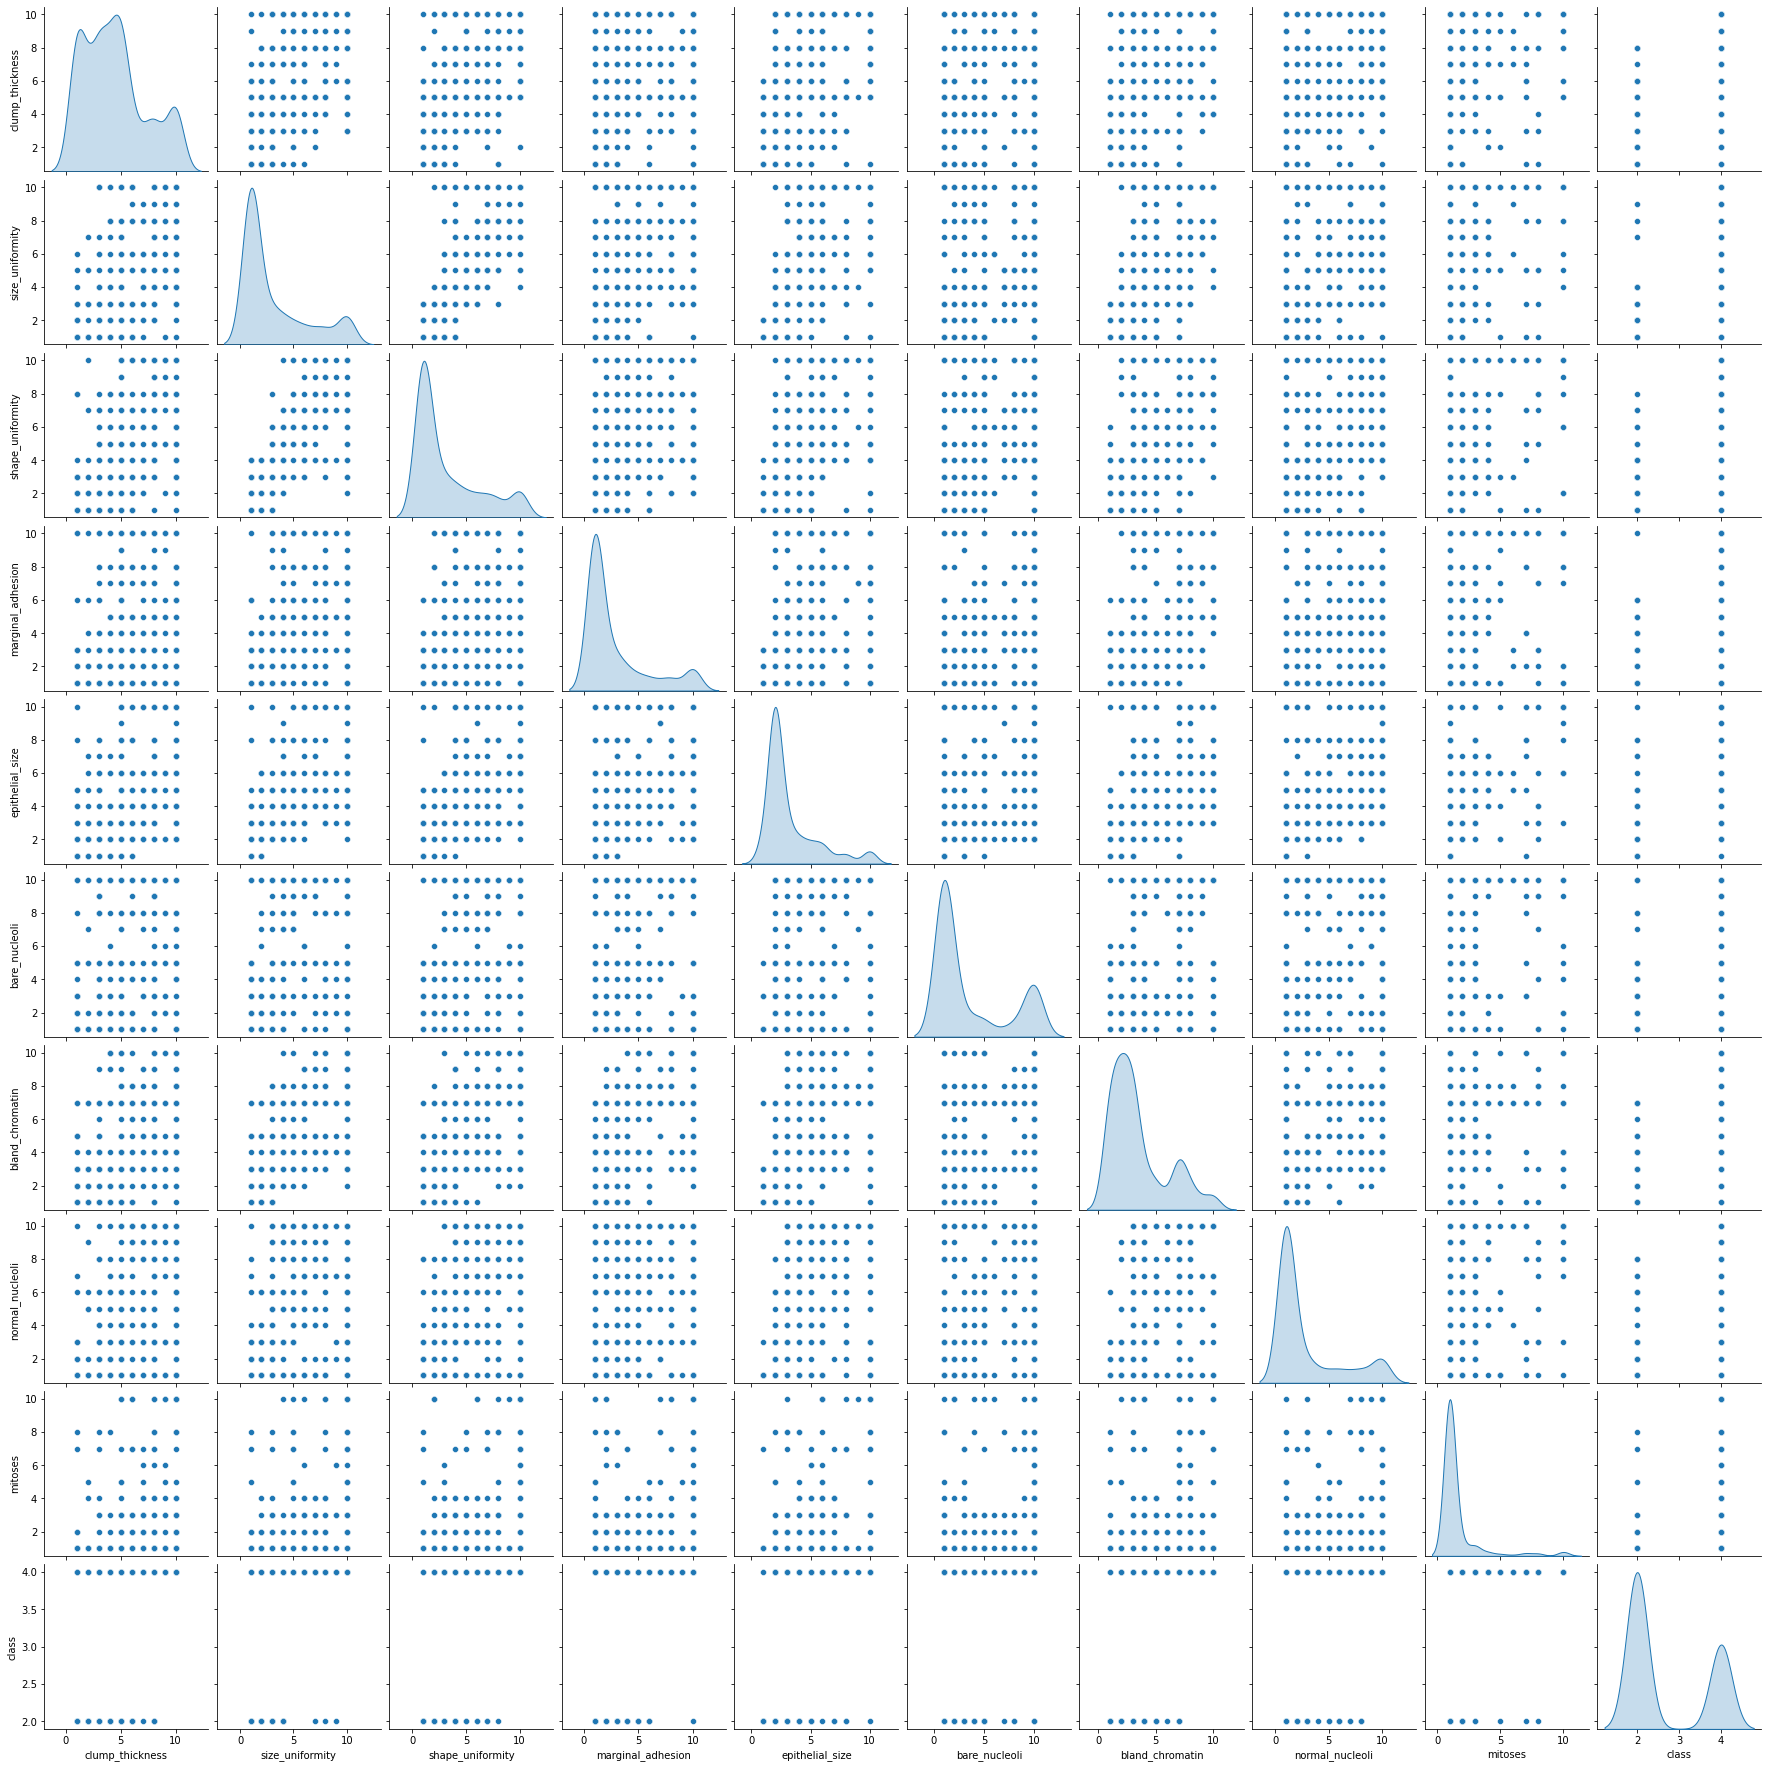

In [43]:
sns.pairplot(df,diag_kind='kde')

In [47]:
X=df.drop('class',axis=1)
Y=df['class']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size= 0.20, random_state=42)


In [50]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(train_x,train_y)
pred1 = KNN.predict(test_x)
Accuracy_knn = KNN.score(test_x,test_y)*100
print ("accuracy of the model is {0:.2g}%".format(Accuracy_knn))

accuracy of the model is 95%


In [51]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(train_x,train_y)
pred2 = SVM.predict(test_x)
SVM.score(test_x,test_y)

0.948905109489051

In [52]:
from sklearn.metrics import classification_report
print ("KNN classifier")
print (classification_report(test_y,pred1))


KNN classifier
              precision    recall  f1-score   support

           2       0.93      0.99      0.96        79
           4       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137



In [53]:
print ("SVM classifier")
print (classification_report(test_y,pred2))

SVM classifier
              precision    recall  f1-score   support

           2       0.94      0.97      0.96        79
           4       0.96      0.91      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137



In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
gaussian = GaussianNB()
gaussian.fit(X, Y)  
pred3= gaussian.predict(X)  
acc_gaussian = round(gaussian.score(X, Y) * 100, 2)

In [75]:
print (classification_report(Y,pred3))


              precision    recall  f1-score   support

           2       0.99      0.95      0.97       444
           4       0.92      0.98      0.95       239

    accuracy                           0.96       683
   macro avg       0.95      0.97      0.96       683
weighted avg       0.96      0.96      0.96       683



In [76]:
logreg = LogisticRegression()
logreg.fit(X, Y)

pred4 = logreg.predict(X)

acc_log = round(logreg.score(X, Y) * 100, 2)

<IPython.core.display.Javascript object>

In [77]:
print (classification_report(Y,pred4))


              precision    recall  f1-score   support

           2       0.98      0.98      0.98       444
           4       0.96      0.95      0.96       239

    accuracy                           0.97       683
   macro avg       0.97      0.97      0.97       683
weighted avg       0.97      0.97      0.97       683



In [83]:
from sklearn import linear_model

from sklearn.linear_model import SGDClassifier


In [84]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X, Y)
pred5 = sgd.predict(X)

sgd.score(X, Y)

acc_sgd = round(sgd.score(X, Y) * 100, 2)
print (classification_report(Y,pred5))

              precision    recall  f1-score   support

           2       0.94      0.99      0.96       444
           4       0.98      0.88      0.93       239

    accuracy                           0.95       683
   macro avg       0.96      0.94      0.95       683
weighted avg       0.95      0.95      0.95       683

